# Homework 3 - Logistic Regression

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart disease. It's different than the previous HW in terms of data:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death: if the patient died during the follow-up period (boolean) 

For each ```boolean``` variable, a value of 1 = True and 0 = False. For sex, female = 0 and male = 1.


### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict patient survival

In this assignment, we will be using Logistic Regression to try and predict heart disease.

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW3.ipynb

If you submit a zip file or anything else, you will receive -5 points.

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data

In [2]:
hearts = pd.read_csv('data_hw3.csv')
hearts.info()
# No missing values and no objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [3]:
hearts.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
hearts.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
hearts.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


### Part 1: Visual Analysis

__Q1:__ How many patients are there?

299 patients

By now, you've had lots of experience with doing plots in Seaborn and Matplotlib. So for the visual analysis, you have a little bit more leash. Create __5__ or more unique plots that help you to explore and understand the data, whether that be analyzing a specific column or comparing different columns. More analysis usually results in extra points. If your answers or analysis are clearly an attempt at an easy answer or just stating what methods you used, you __will__ lose points. Remember, most of the points in the HW assignments come from your interpretation, not just copy and pasting code.

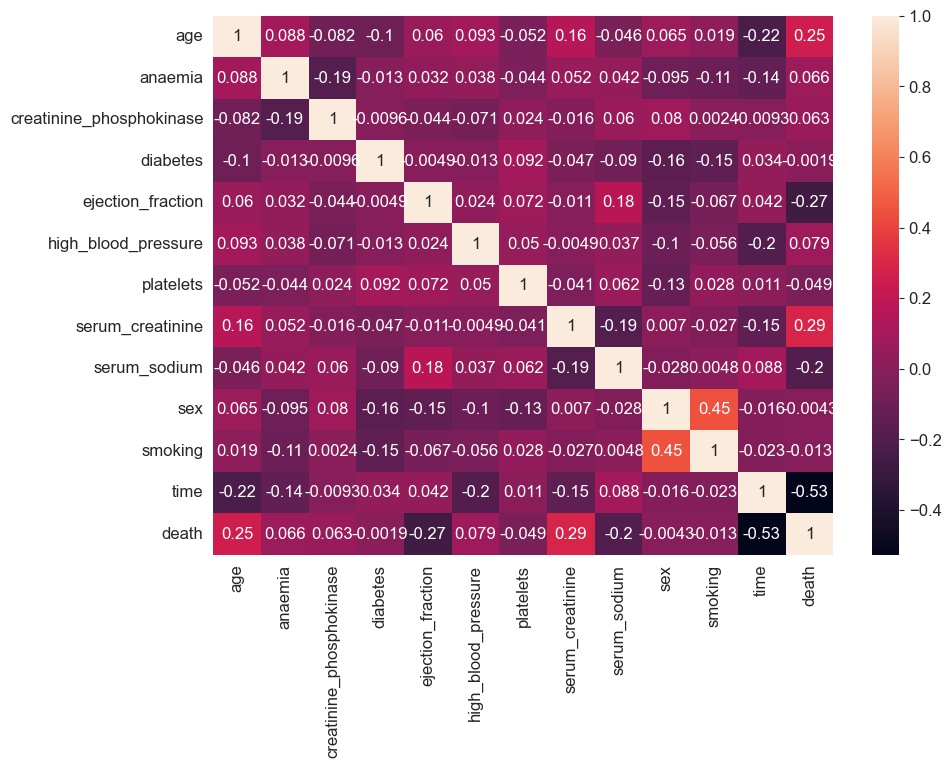

In [6]:
sns.heatmap(data = hearts.corr(), annot = True)
plt.show()
# No major collinearity. In fact, there's almost no correlation for most of the variables with one another, aside from a few select pairs

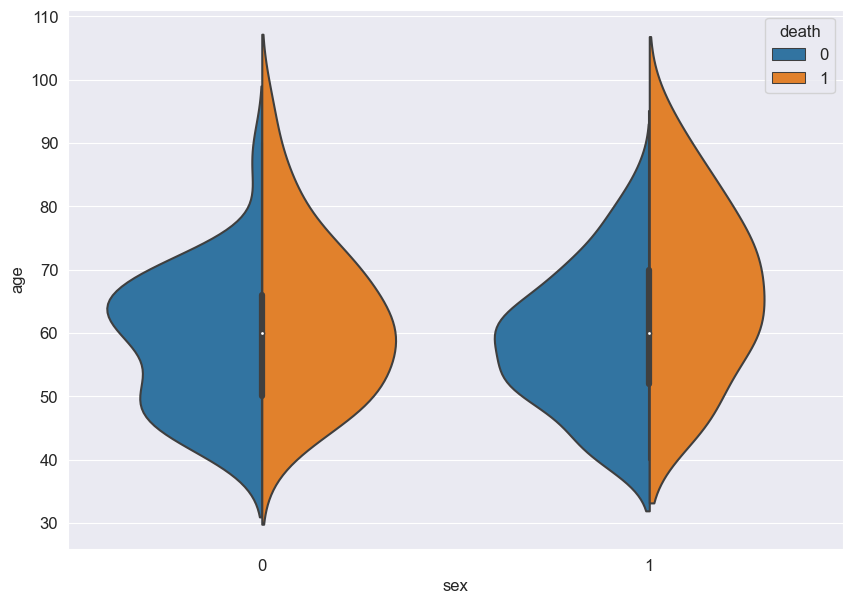

In [7]:
sns.violinplot(x = 'sex', y = 'age', data = hearts, hue = 'death', split = True)
plt.show()
# A majority of participants in the study were 60 years old or older
# Both sexes seem to have an even number of living and dying participants

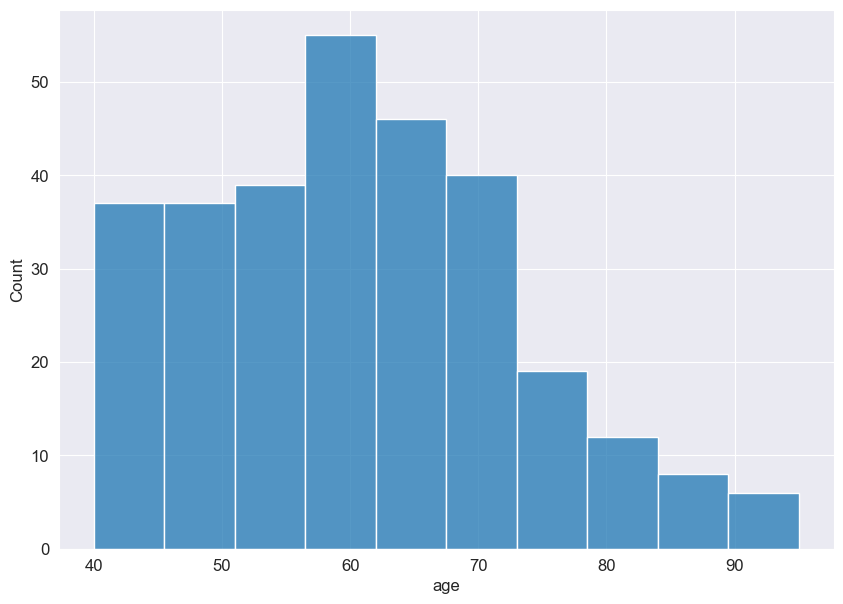

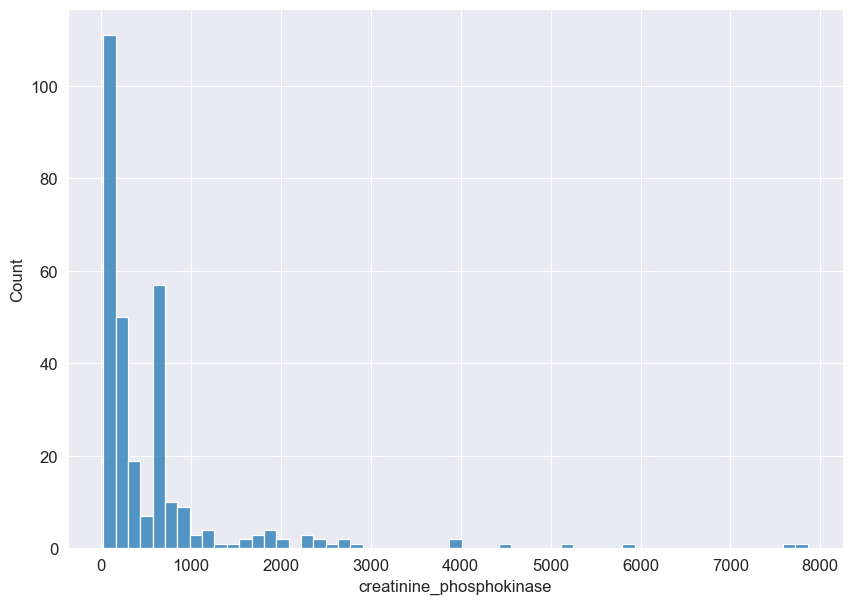

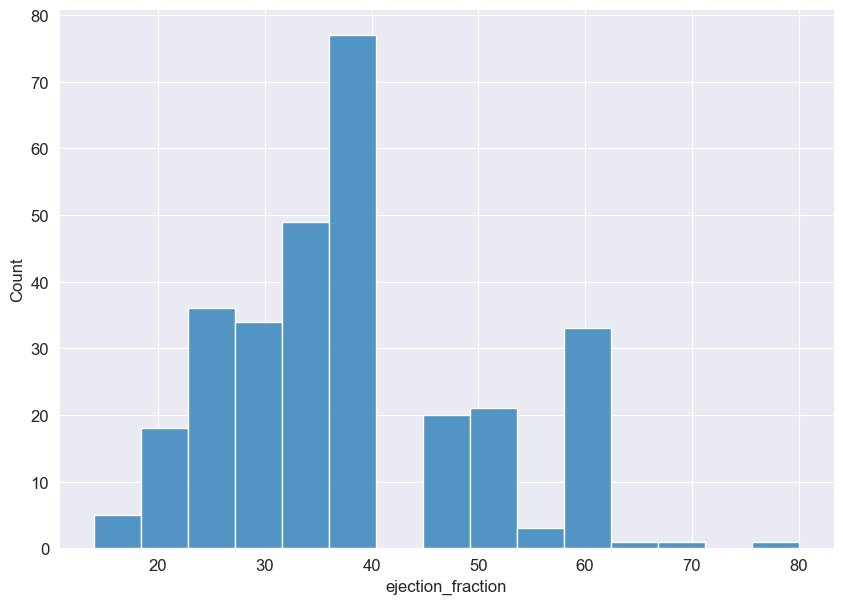

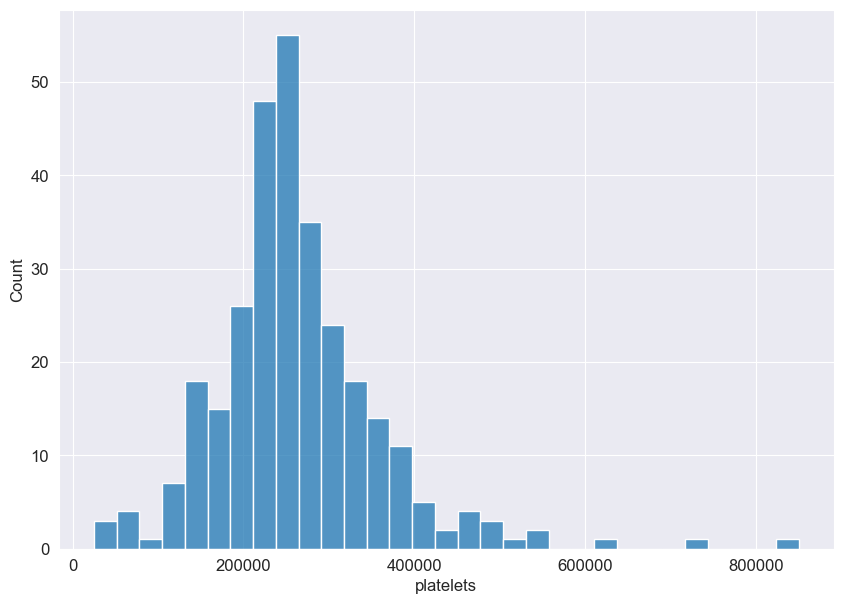

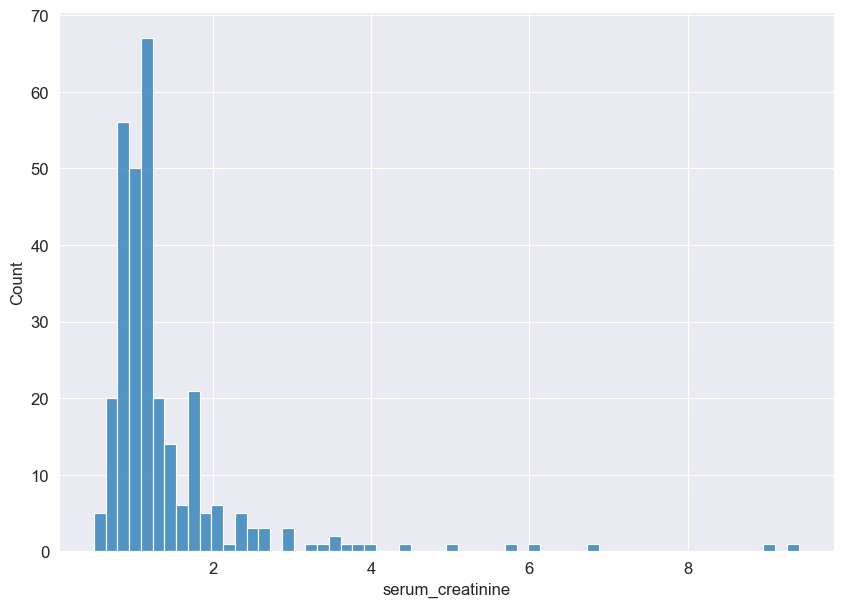

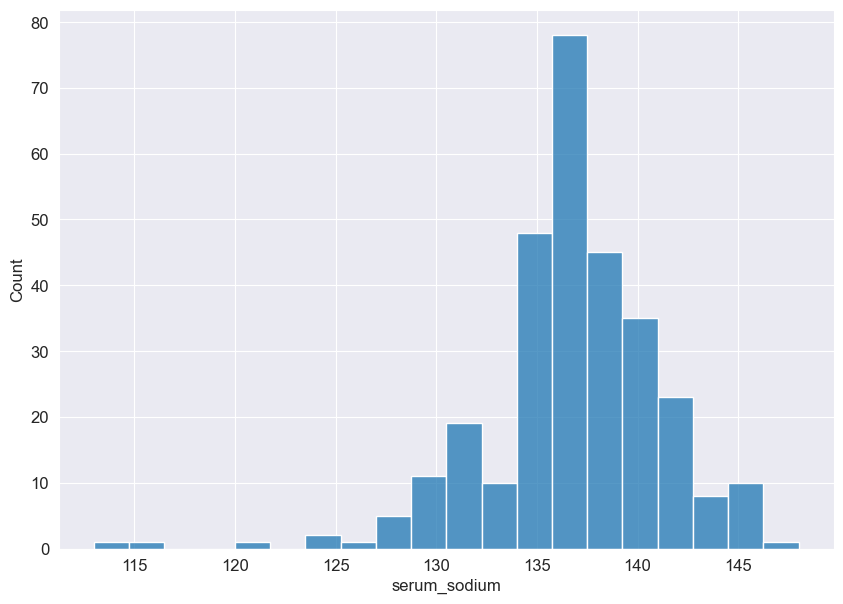

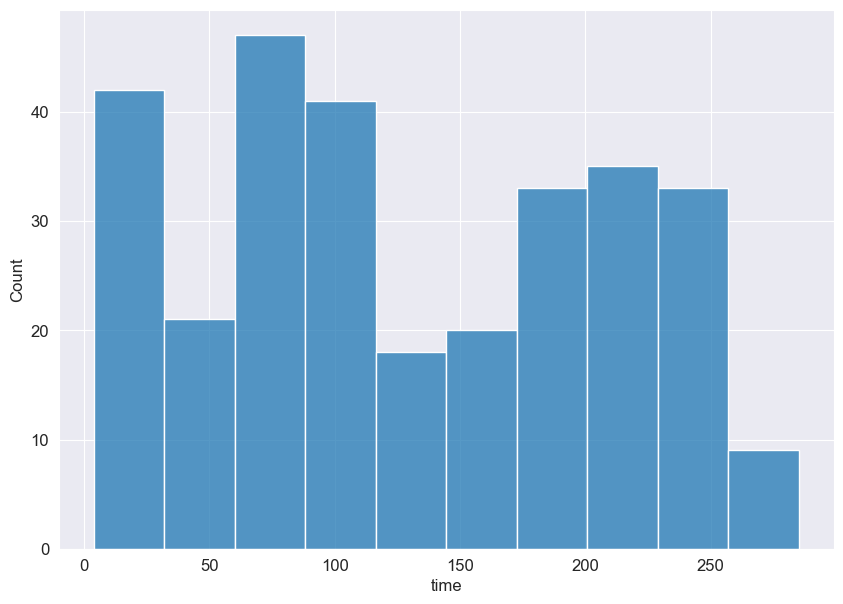

In [8]:
variables = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
for i in variables:
    sns.histplot(x = hearts[i])
    plt.show()
# There doesn't appear to be any rhyme or reason to the followup timeframe. Although more occur within the first 100 days, there's still a large chunk of participants past that time frame
# Serum sodium and Ejection fraction both appear to follow a mostly gaussian distribution. The other attributes, aside from time, resemble a gaussian distribution but are favored to one side or the other

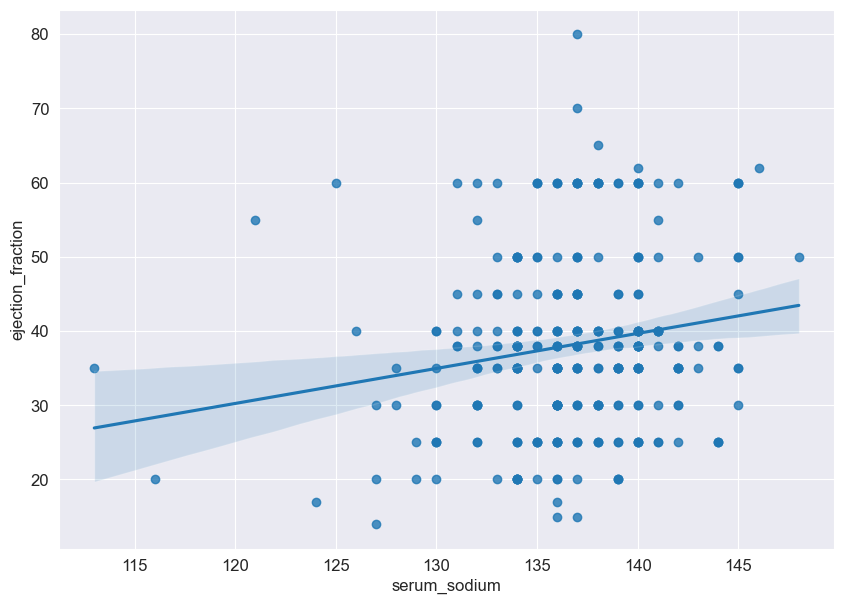

In [9]:
# Serum sodium and Ejection fraction are also the two variables with the highest correlation to death in the heatmap, although it's still low
# It's worth checking if they demonstrate any correlation with one another
sns.regplot(x = hearts['serum_sodium'], y = hearts['ejection_fraction'])
plt.show()
# There's virtually no correlation. Maybe slight trends towards the median  of the serum sodium distribution, but nothing statistically significant

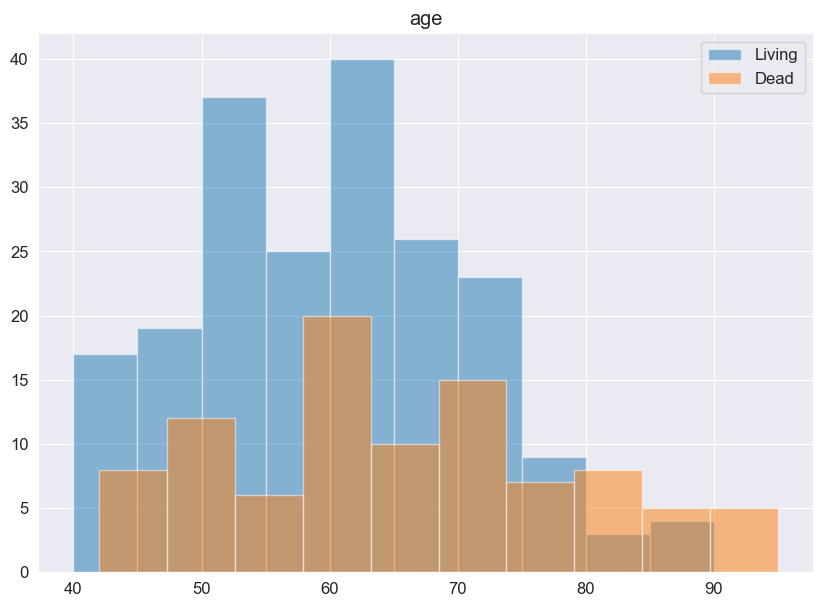

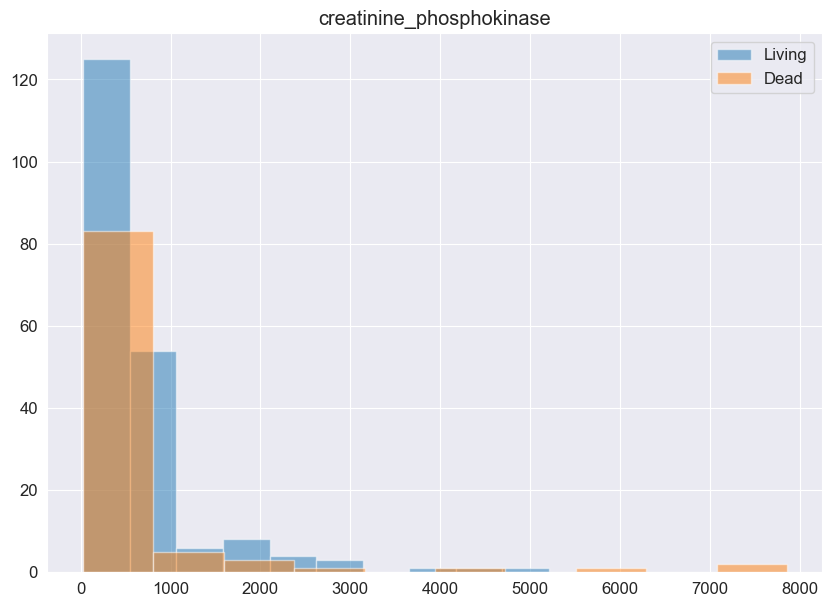

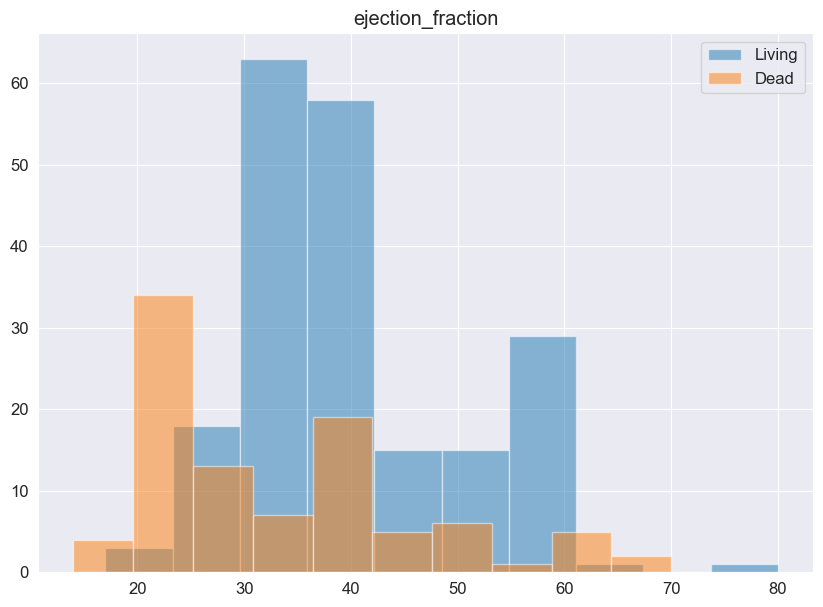

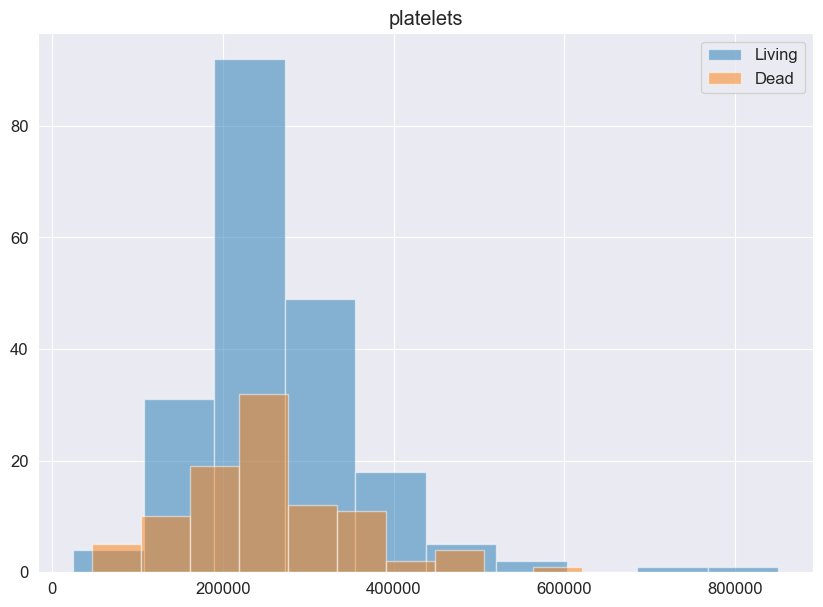

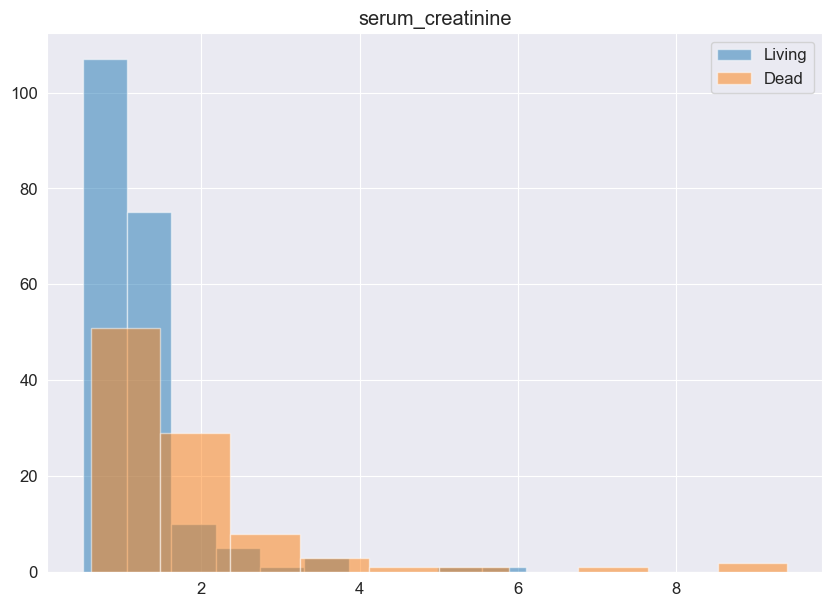

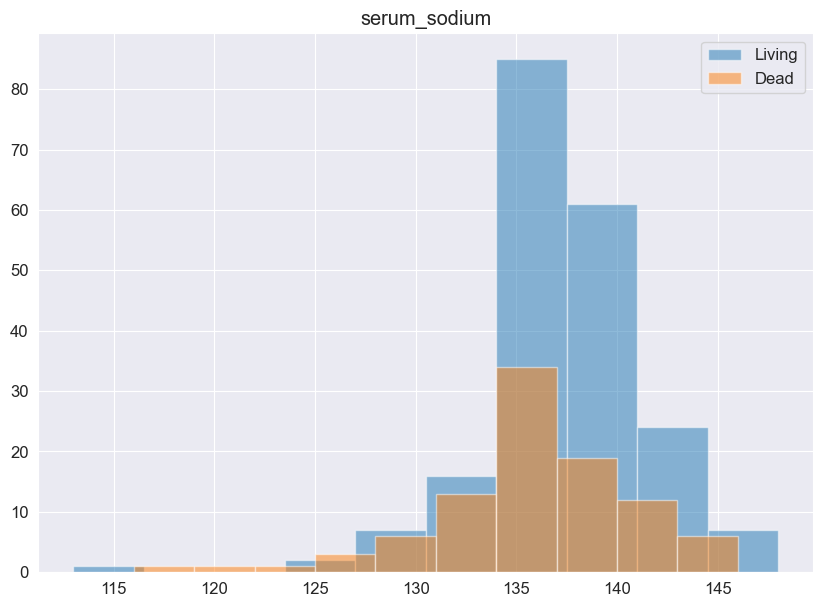

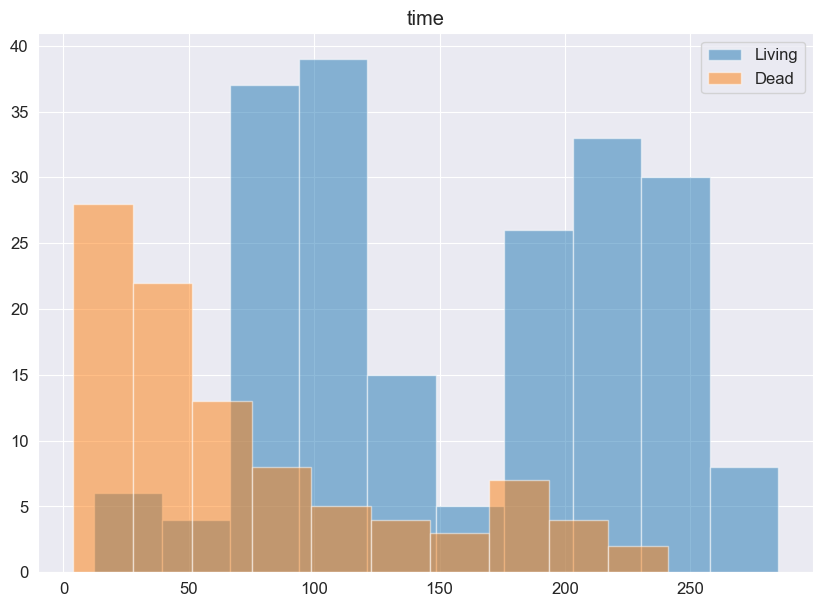

In [10]:
# We've established there is not much bias or correlation between our numeric variables, so I'd like to see if there's any observable patterns between each of them and death
variables = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
group_one = hearts[(hearts['death'] == 0)]
group_two = hearts[(hearts['death'] == 1)]
for i in variables:
    plt.hist(x = group_one[i], label = 'Living', alpha = 0.5)
    plt.hist(x = group_two[i], label = 'Dead', alpha = 0.5)
    plt.legend()
    plt.title(i)
    plt.show()
# In most cases, both groups follow the same relationship. However, in the case of ejection fraction, there is an earlier peak for deaths than lives
# Additionally, time and death have an inverse relationship, which is expected as those that wouldn't make it to a later check in date die out earlier to begin with

__Q2:__ Was there anything interesting you learned from your plots? If so, what?

It was interesting to see that our dataset is so pure. That is to say, there's very little collinearity if any across the attributes. This could either be great for our data as we find relationships that are not evident on the surface or we might be barking up the wrong tree with the data that we selected and not find much evidence at all.

__Q3:__ Is there anything the data did not tell you that you expected to see?

I expected to see a much higher correlation between health conditions, such as high blood pressure, and an activity like smoking which is well established to have negative health consequences. It's completely possible that the lack of data like glucose levels, BMI, and physical activity levels might be hiding a correlation with high blood pressure, but we cannot reasonably make that hypothesis without any evidence.

### Part 2: Logistic Regression

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be largely on your own, with less detailed instructions. If you have any questions, check out your previous labs, the lecture notes, or the just google the specific function to see how to use it.

First, let's scale and then split the data. You choose what test_size to use. For the scalar, we know that most of our features do not follow a normal distribution (as most are categorical variables), so we will use the MinMaxScaler(). Create the following:

- train_x    (pandas df)
- test_x     (pandas df)    
- train_y    (array)
- test_y     (array)

In [11]:
scaler = MinMaxScaler()

X_initial = hearts[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]
y = hearts['death'].copy()
X_scaled = scaler.fit_transform(X_initial)
X = pd.DataFrame(data = X_scaled, columns = X_initial.columns)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

X.sample(n = 5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
193,0.600000,1.0,0.026537,1.0,0.242424,0.0,0.163535,0.076404,0.828571,1.0,1.0
31,0.818182,0.0,0.000000,0.0,0.469697,0.0,0.405989,0.280899,0.542857,1.0,0.0
203,0.363636,0.0,0.004593,0.0,0.166667,1.0,0.226573,0.337079,0.657143,1.0,1.0
225,0.636364,0.0,0.083184,1.0,0.696970,0.0,0.290823,0.101124,0.342857,0.0,0.0
145,0.181818,0.0,0.020669,0.0,0.242424,0.0,0.292035,0.022472,0.800000,1.0,1.0


Create a Logistic Regression Model and output the accuracy on the training and testing set

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression(max_iter = 1000)
log.fit(train_x, train_y)

predictions1 = log.predict(train_x)
score = accuracy_score(train_y, predictions1)
print("Training Accuracy\n")
print(score)

Training Accuracy

0.7280334728033473


In [13]:
from sklearn.metrics import accuracy_score

predictions2 = log.predict(test_x)
score = accuracy_score(test_y, predictions2)
print("Testing Accuracy\n")
print(score)

Testing Accuracy

0.75


__Q4:__ What interval are the outputs of a logistic regression model contained in?

Outputs are within the interval [0, 1] for a logistic regression model because it is attempting to classify the data it receives. The closer to 1, the more likely something is true or falls under a certain classification, and the inverse is true for outputs closer to 0.

__Q5:__ How does a Logistic Regression model classify data in a binary way?

A logistic regression model takes a linear combination of the provided attributes and plugs them into the sigmoid function. The output of said sigmoid function is then mapped to the interval [0, 1] and used to estimate the probability of the given input falling under one class or the other, where 0 means 0% and 1 means 100%.

Create a confusion matrix for the testing data.

Add ```plt.grid(b=None)``` after your code if you get gridlines

[[41  1]
 [14  4]]


<AxesSubplot:>

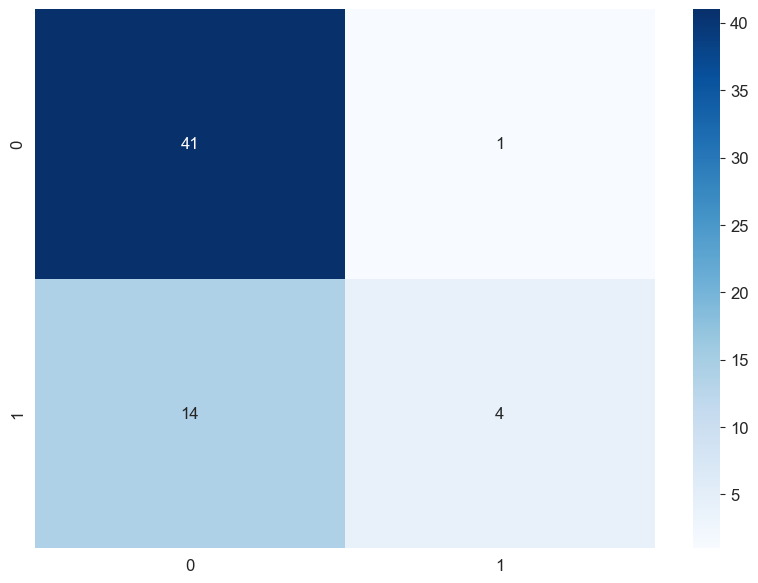

In [14]:
confused = confusion_matrix(test_y, predictions2)
print(confused)
sns.heatmap(confused, annot = True, cmap = 'Blues')

Print the recall

In [15]:
#from sklearn.metrics import recall_score

#print(recall_score(predictions2, test_y))
from sklearn.metrics import classification_report

print(classification_report(test_y, predictions2))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        42
           1       0.80      0.22      0.35        18

    accuracy                           0.75        60
   macro avg       0.77      0.60      0.60        60
weighted avg       0.76      0.75      0.70        60



In [16]:
from sklearn.metrics import recall_score

print(recall_score(test_y, predictions2, average = 'weighted'))

0.75


__Q6:__ What does the recall represent (Don't just tell me the formula)?

Recall represents the ability of a model to correctly predict positive outcomes. That is to say, how reliably can we assume the model is able to identify a positive outcome when it should? A higher recall means that its ability to positively identify input is higher, which is critical in cases where a false negative would have disastrous consequences like in cancer diagnosis.

Print the precision

In [17]:
from sklearn.metrics import precision_score

print(precision_score(test_y, predictions2, average = 'weighted'))

0.7618181818181818


__Q7:__ What does the precision represent (Don't just tell me the formula)?

While recall attempts to measure how often the model correctly predicts something positively, precision attempts to see what portion of those positive predictions are actually positive. So, for example, a model could predict positive for everything and end up with a perfect recall score, great! However, the precision would be low because the amount of false positives would be quite high. This enables us to see if there's actual weight to a positive diagnosis.

__Q8:__ Which types of errors would be more costly for this problem, False Positives or False Negatives? Why?

False negatives would undoubtedly be far worse than false positives in this case as someone who's in need of medical aid that receives a false negative would be left to die. Those who don't need medical aid but receive treatment will not deal with the same drastic consequence, more so an inconvenience. Between death and an inconvenience, the choice is clear.

Now, let's plot the predictions to try and get an idea of how our model performed. Plot the probability predictions of class label 1 (death), not the classification.

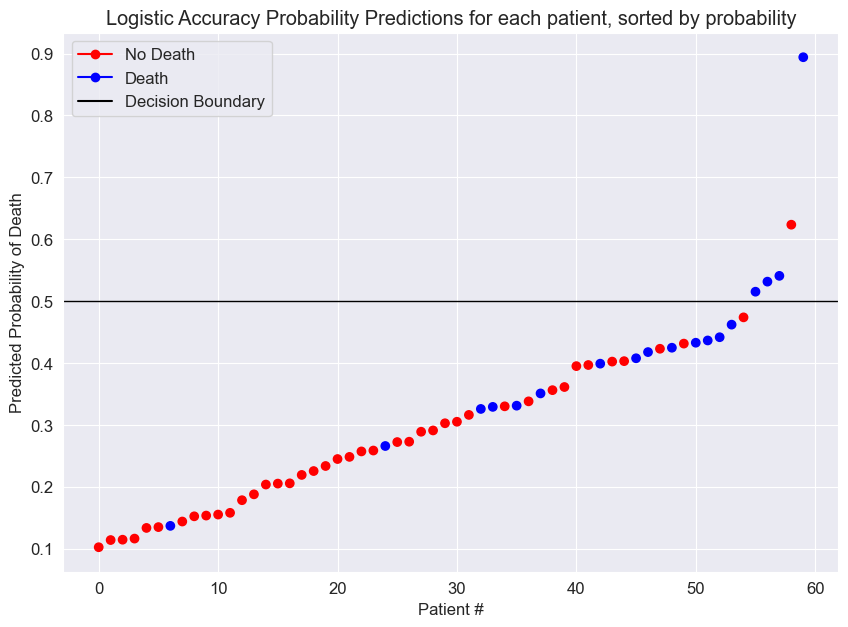

In [18]:
y_pred_prob = log.predict_proba(test_x)[:, 1]
y_pred = predictions2

data = pd.DataFrame(data = y_pred_prob, columns = ['probability'])
data['predictions'] = y_pred
data['true_values'] = np.array(test_y)
data = data.sort_values(by = ['probability'])

colors = np.where((data['true_values'] == 1), 'blue', 'red')

plt.scatter(range(len(data['predictions'])), data['probability'], c = colors)
plt.axhline(0.5, color = 'k', linestyle = '-', linewidth = 1)

plt.plot([], [], color = 'red', marker = 'o', label = 'No Death')
plt.plot([], [], color = 'blue', marker = 'o', label = 'Death')
plt.plot([], [], 'k-', label = 'Decision Boundary')
plt.legend()

plt.title('Logistic Accuracy Probability Predictions for each patient, sorted by probability')
plt.xlabel('Patient #')
plt.ylabel('Predicted Probability of Death')
plt.show()

__Q9:__ Does this plot tell us anything interesting about our model? How well does it classify the data?

Our model heavily favors predicting no death properly and fails to predict death in more than half of the cases. This was not picked up on in the data analysis because the overwhelming amount of predicted no deaths outweighed the half of deaths incorrectly classified.

Create a data frame of the coefficients of the model

In [19]:
coefs = []
for i in log.coef_[0]:
    coefs.append(i)
labels = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking']
df_data = {'Features': labels, 'Coefficients': coefs}
df = pd.DataFrame(data = df_data)
print(df)

                    Features  Coefficients
0                        age      1.495869
1                    anaemia      0.405675
2   creatinine_phosphokinase      0.799215
3                   diabetes      0.031815
4          ejection_fraction     -2.211957
5        high_blood_pressure      0.335435
6                  platelets      0.047349
7           serum_creatinine      2.122798
8               serum_sodium     -0.796997
9                        sex     -0.148405
10                   smoking     -0.033392


__Q10:__ What do these coefficients mean? How are they calculated?

The coefficients each indicate the amount that the given feature contributes to the overall prediction and how it affects that prediction. A positive coefficient means that as that feature increases, so to do the odds of the prediction being true. Vice versa is true for a negative coefficient. Additionally, the greater the magnitude of said coefficients, the more influence they have on the end result. They're calculated using maximum likelihood estimation.

__Q11__: Based on that, which features are important to the model?

Based on what we know the coefficients represent, I would say that undoubtedly age, ejection fraction, serum creatinine, and serum sodium are the most important features in this model as their magnitudes are the greatest by a significant margin over the other features.

Do any other analysis you see fit, whether exploring the data more, assessing the model more intensely, etc.

In [20]:
# Based on the fact that we've determined what attributes are most heavily weight in the regression, I wnat to try using them in a random forest
from sklearn.ensemble import RandomForestClassifier

X_i = hearts[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
X_scaled_tree = scaler.fit_transform(X_i)
X2 = pd.DataFrame(data = X_scaled_tree, columns = X_i.columns)

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2)

rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print("Accuracy with just the four most heavily-weighed variables:", accuracy_score(y_test, rfc_pred))

rfc.fit(train_x, train_y)

rfc_pred2 = rfc.predict(test_x)
print("Accuracy with all variables:", accuracy_score(test_y, rfc_pred2))

# Initial testing had suggested the four most heavily weighed attributes contributed to a higher accuracy score, but repeated tests shows that this was an irregularity

Accuracy with just the four most heavily-weighed variables: 0.7166666666666667
Accuracy with all variables: 0.8166666666666667


In [21]:
log.fit(X_train, y_train)
pred_2 = log.predict(X_test)
print("Accuracy with just the four most heavily-weighed variables:", accuracy_score(y_test, pred_2))
print(classification_report(y_test, pred_2))
# Not much changed in the accuracy department as well as with precision and recall. Further testing required

Accuracy with just the four most heavily-weighed variables: 0.7166666666666667
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        38
           1       1.00      0.23      0.37        22

    accuracy                           0.72        60
   macro avg       0.85      0.61      0.59        60
weighted avg       0.80      0.72      0.65        60



Finally, write your final report about your conclusions. Remember, you should write 1 - 2 paragraphs about what you did, why you did it, and what it means for the stakeholder. I _don't_ just want a summary of the work you did. I know what you did. I want to know what the analysis told you about the data. 

Based on the analysis of the provided data, we were able to determine four attributes that are decent indicators that a patient is at risk for a life-threatening health condition. The logistic regression was performed at first to attempt to classify the patients as effectively as possible, but as it revealed that it was not very accurate it instead provided insight into the four most heavily weighted attributes: age, ejection fraction, serum creatinine, serum sodium. Upon performing a random forest with the same attributes as the logistic regression and one with those four exclusively, the model showed a reduced but servicable accuracy rating. Although it became worse than the logistic regression, the fact that it was still a serviceable model shows that these attributes provide the most evidence for the classified outcome.

For the stakeholder, this identifies the attributes that they should pay the most attention to when evaluating a patient. Age is not a surprising factor to see among the four as time typically worsens health conditions. Looking into the three others makes it plainly clear why they too are so influential. In layman's terms, ejection fraction measures the efficiency of the heart to pump out blood, serum creatinine measures the efficiency of the kidney's to filter the blood stream, and serum sodium measures chloesterol levels. All three of those play heavily into major health conditions such as signs of heart and kidney failure. This gives further reason for our client to look into these factors especially as these are life-threatening conditions that should be treated at their first sign.